<a href="https://colab.research.google.com/github/dolmani38/nash_loss/blob/master/A_Continuos_Optimization_Algorithm_based_on_Fictitious_Play_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np


# 주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
# 전체 pure strategy와 mixed strategy를 생성한다.

def make_strategy(number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
    """
    [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
    .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
    """
    def non_duplicate_randrange(l,h,r,c):
        #lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        #while (not len(lst[:,0]) == len(set(lst[:,0]))):
        #    lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        #return lst    
        t = np.ones((c,2))
        x = np.linspace(l, h, c)
        t[:,0] = x[:]
        t[:,1] = 1/c    
        return t      
    
    S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
    return np.asarray(S, dtype=np.float64)


#S에서 player들에 대한 전략을 선택 한다.
#선택은 mixed strategy의 확율에 의해..
def choice_strategies(strategy_matrix):
    return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])



In [16]:
#Step1-1
#모든 player의 pure strategy와, mixed strategy의 생성 & 확인
# S에 해당.
strategy_matrix = make_strategy(10,[-20,20],20,1)
strategy_matrix

array([[[-20.        ,   0.05      ],
        [-17.89473684,   0.05      ],
        [-15.78947368,   0.05      ],
        [-13.68421053,   0.05      ],
        [-11.57894737,   0.05      ],
        [ -9.47368421,   0.05      ],
        [ -7.36842105,   0.05      ],
        [ -5.26315789,   0.05      ],
        [ -3.15789474,   0.05      ],
        [ -1.05263158,   0.05      ],
        [  1.05263158,   0.05      ],
        [  3.15789474,   0.05      ],
        [  5.26315789,   0.05      ],
        [  7.36842105,   0.05      ],
        [  9.47368421,   0.05      ],
        [ 11.57894737,   0.05      ],
        [ 13.68421053,   0.05      ],
        [ 15.78947368,   0.05      ],
        [ 17.89473684,   0.05      ],
        [ 20.        ,   0.05      ]],

       [[-20.        ,   0.05      ],
        [-17.89473684,   0.05      ],
        [-15.78947368,   0.05      ],
        [-13.68421053,   0.05      ],
        [-11.57894737,   0.05      ],
        [ -9.47368421,   0.05      ],
        [ 

In [17]:
#Step1-2
#최초 t=1에 해당하는 player의 strategy 선택 & 확인 
t1 = choice_strategies(strategy_matrix)
t1

array([-20.        ,  -3.15789474,   7.36842105, -17.89473684,
        -5.26315789, -17.89473684, -15.78947368, -11.57894737,
        -1.05263158,  17.89473684])

In [18]:
#Step2-1
# player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
def make_Y_sample(strategy_matrix,player=0,p_strategy=0,sample_count = 10):
    Y_sample = np.asarray([choice_strategies(strategy_matrix) for i in range(sample_count)])
    Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
    return Y_sample


sample_count = 10
#(s0,Y-0(t))
Y0 = np.asarray([make_Y_sample(strategy_matrix,player=0,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])])
print("Shape of Y-0",Y0.shape)
Y0

Shape of Y-0 (20, 10, 10)


array([[[-20.        ,  11.57894737,  -1.05263158, ...,  20.        ,
          -3.15789474,  15.78947368],
        [-20.        ,  15.78947368,  11.57894737, ...,   5.26315789,
           5.26315789, -20.        ],
        [-20.        , -20.        , -20.        , ...,  -1.05263158,
           1.05263158,  20.        ],
        ...,
        [-20.        ,  17.89473684,   9.47368421, ...,   3.15789474,
          -3.15789474, -17.89473684],
        [-20.        ,   3.15789474,  20.        , ...,  -7.36842105,
          -3.15789474,  -3.15789474],
        [-20.        ,   1.05263158,  -1.05263158, ..., -15.78947368,
          -5.26315789,  17.89473684]],

       [[-17.89473684, -11.57894737,  15.78947368, ..., -13.68421053,
          -9.47368421, -15.78947368],
        [-17.89473684,  13.68421053,   5.26315789, ..., -11.57894737,
          -7.36842105,  17.89473684],
        [-17.89473684,  -1.05263158,   5.26315789, ...,   3.15789474,
          15.78947368,  17.89473684],
        ...,


In [19]:
#Step2-2
#모든 player에 대한 (si,Y-i(t))의 생성

si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
# player_count,pure_strategy_count,sample_count,strategy_count
print("Shape of si_Y_i",si_Y_i.shape)
si_Y_i


Shape of si_Y_i (10, 20, 10, 10)


array([[[[-20.        , -20.        ,   5.26315789, ...,   1.05263158,
           -9.47368421, -20.        ],
         [-20.        , -15.78947368,  11.57894737, ...,  15.78947368,
          -11.57894737,  11.57894737],
         [-20.        , -17.89473684,   9.47368421, ...,  11.57894737,
           -9.47368421,   1.05263158],
         ...,
         [-20.        , -20.        ,  13.68421053, ...,   7.36842105,
          -20.        , -20.        ],
         [-20.        ,   1.05263158, -11.57894737, ...,  -5.26315789,
           17.89473684, -15.78947368],
         [-20.        , -15.78947368,  -9.47368421, ...,  13.68421053,
          -20.        , -13.68421053]],

        [[-17.89473684,  11.57894737,  15.78947368, ..., -13.68421053,
           -7.36842105,  13.68421053],
         [-17.89473684,   7.36842105,  13.68421053, ...,  20.        ,
          -20.        ,  13.68421053],
         [-17.89473684,  -9.47368421, -13.68421053, ...,  15.78947368,
          -15.78947368, -20.     

In [20]:
#Step2-3
# 목적함수(Test Function)의 정의
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

#Step2-4
# (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
def _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:]):
    y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
    return y_m

y_m = _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:])
y_m

array([-38.50116336, -16.32023999, -11.87241929,  -0.72660278,
        -8.86006858,  12.58620428, -13.55060105,  11.96911989,
        12.76946391,  -9.05717016,   2.63252123, -14.86092478,
        -6.91288703,  -2.33305769,   7.51426524,  18.02938892,
        -8.85610636,  14.78032981,   9.82703303,  18.45870743])

In [21]:
# t+1에서 player 0의 best response 취득 
# 

br_0 =  strategy_matrix[0,y_m.argmin(),0]
br_0

-20.0

In [22]:
#Step2-5
# t+1에서 모든 player에 대한 best response 취득

br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
br

array([-20.        , -15.78947368, -17.89473684, -20.        ,
       -13.68421053, -15.78947368, -17.89473684, -20.        ,
       -17.89473684, -20.        ])

In [23]:
#Step3-1
# player 0의 t+1에 대한 mixed strategy의 갱신
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
print(strategy_matrix[0,:,1])
t=1
strategy_matrix[0,:,1] = strategy_matrix[0,:,1]+(1/(t+1))*(((strategy_matrix[0,:,0]==br[0]) * 1) - strategy_matrix[0,:,1])
strategy_matrix[0,:,:]

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


array([[-20.        ,   0.525     ],
       [-17.89473684,   0.025     ],
       [-15.78947368,   0.025     ],
       [-13.68421053,   0.025     ],
       [-11.57894737,   0.025     ],
       [ -9.47368421,   0.025     ],
       [ -7.36842105,   0.025     ],
       [ -5.26315789,   0.025     ],
       [ -3.15789474,   0.025     ],
       [ -1.05263158,   0.025     ],
       [  1.05263158,   0.025     ],
       [  3.15789474,   0.025     ],
       [  5.26315789,   0.025     ],
       [  7.36842105,   0.025     ],
       [  9.47368421,   0.025     ],
       [ 11.57894737,   0.025     ],
       [ 13.68421053,   0.025     ],
       [ 15.78947368,   0.025     ],
       [ 17.89473684,   0.025     ],
       [ 20.        ,   0.025     ]])

In [24]:
#Step3-2
#모든 player의 t+1에 대한 mixed strategy의 갱신
t=1
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
for i in range(strategy_matrix.shape[0]):
    strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])

strategy_matrix

array([[[-20.        ,   0.525     ],
        [-17.89473684,   0.025     ],
        [-15.78947368,   0.025     ],
        [-13.68421053,   0.025     ],
        [-11.57894737,   0.025     ],
        [ -9.47368421,   0.025     ],
        [ -7.36842105,   0.025     ],
        [ -5.26315789,   0.025     ],
        [ -3.15789474,   0.025     ],
        [ -1.05263158,   0.025     ],
        [  1.05263158,   0.025     ],
        [  3.15789474,   0.025     ],
        [  5.26315789,   0.025     ],
        [  7.36842105,   0.025     ],
        [  9.47368421,   0.025     ],
        [ 11.57894737,   0.025     ],
        [ 13.68421053,   0.025     ],
        [ 15.78947368,   0.025     ],
        [ 17.89473684,   0.025     ],
        [ 20.        ,   0.025     ]],

       [[-20.        ,   0.025     ],
        [-17.89473684,   0.025     ],
        [-15.78947368,   0.525     ],
        [-13.68421053,   0.025     ],
        [-11.57894737,   0.025     ],
        [ -9.47368421,   0.025     ],
        [ 

In [25]:
#Step3-3
#mixed strategy의 갱신 후, 각 player의 strategy 취득
t2 = choice_strategies(strategy_matrix)
t2

array([-20.        , -15.78947368,   1.05263158,  13.68421053,
       -13.68421053, -15.78947368, -11.57894737, -20.        ,
        -3.15789474,   1.05263158])

In [26]:
#Step3-4
#이때의 f1의 값
f1(t2)

-63.896444982312964

In [0]:
#Step4
#t<-t+1로 두고 Step2와 Step3의 t=N회 반복  : 전체 최적화 알고리즘

def continuos_optimization_based_on_play_theory(object_function=f1,
                                                player_count=10,
                                                strategy_range=[-20,20],
                                                number_of_strategies = 20,
                                                sample_count = 10,
                                                epoch = 100,
                                                resolution=1):
    strategy_matrix = make_strategy(player_count,strategy_range,number_of_strategies,resolution)
    history = []
    for t in range(1,epoch+1):
        #Sample strategy 추출
        si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
        #시행에 대한 best response 추출
        br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
        #mixed strategy의 갱신
        for i in range(strategy_matrix.shape[0]):
            strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
        #다음 strategy 추출
        s = choice_strategies(strategy_matrix)
        # 목적함수의 값 산출
        mv = object_function(s)
        print("\r\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), sep=" ", end="", flush=True)
        history.append(mv)
    return strategy_matrix,history    

1/100 object_function([-20.         -20.         -20.           5.26315789   7.36842105
2/100 object_function([-15.78947368 -17.89473684 -20.         -15.78947368 -13.68421053
3/100 object_function([ 17.89473684 -17.89473684 -17.89473684  -7.36842105 -17.89473684
4/100 object_function([-20.         -20.         -17.89473684 -15.78947368  -9.47368421
5/100 object_function([-17.89473684  11.57894737   9.47368421 -15.78947368 -17.89473684
6/100 object_function([-15.78947368 -20.          -9.47368421 -20.         -20.
7/100 object_function([-15.78947368 -17.89473684 -15.78947368 -15.78947368 -13.68421053
8/100 object_function([-20.         -20.         -17.89473684 -20.         -13.68421053
9/100 object_function([-20.         -15.78947368 -20.         -17.89473684 -17.89473684
10/100 object_function([-20.         -20.         -17.89473684 -20.         -13.68421053
11/100 object_function([-15.78947368 -20.         -20.         -20.           1.05263158
12/100 object_function([-17.89473684 -

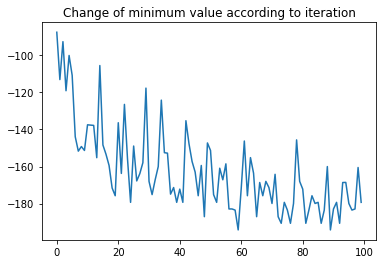

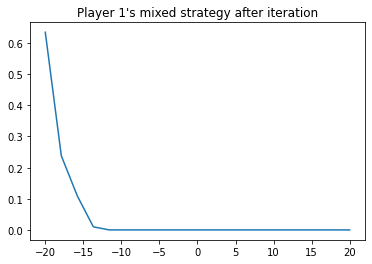

In [28]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

player_count = 10
strategy_range=[-20,20]
number_of_strategies = 20
sample_count = 10
epoch = 100
resolution = 1

S,history = continuos_optimization_based_on_play_theory(object_function=f1,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()

1/100 object_function([ -7.36842105  -1.05263158  17.89473684  -5.26315789  -1.05263158
2/100 object_function([  3.15789474  -7.36842105   3.15789474  -1.05263158  -5.26315789
3/100 object_function([-1.05263158 -5.26315789 -7.36842105 -1.05263158 -5.26315789  1.05263158
4/100 object_function([ 9.47368421  1.05263158 -7.36842105  1.05263158  7.36842105 -1.05263158
5/100 object_function([-7.36842105  1.05263158 -7.36842105 -5.26315789  7.36842105  1.05263158
6/100 object_function([-3.15789474 -3.15789474 -9.47368421 -1.05263158 -1.05263158  1.05263158
7/100 object_function([ -7.36842105 -17.89473684  -5.26315789   5.26315789   7.36842105
8/100 object_function([ 1.05263158 -3.15789474  3.15789474 -5.26315789 -5.26315789  1.05263158
9/100 object_function([-1.05263158 -7.36842105 -7.36842105  1.05263158 -9.47368421  1.05263158
10/100 object_function([-1.05263158 -7.36842105 -5.26315789 -3.15789474  5.26315789 -7.36842105
11/100 object_function([-13.68421053   1.05263158   5.26315789   1.052

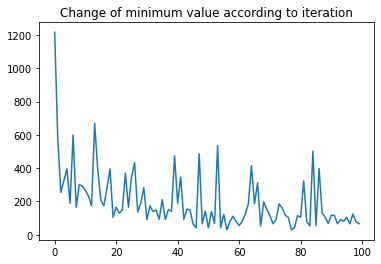

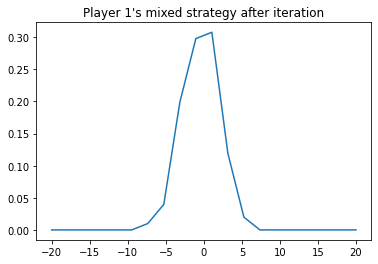

In [29]:
# 실험2
# 논문에서 f2에 해당하는 함수
def f2(player_strategies):
    y = np.sum(player_strategies*player_strategies - 10 * np.cos(2*np.pi*player_strategies)+10)
    return y

S,history = continuos_optimization_based_on_play_theory(object_function=f2,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()

1/100 object_function([ 11.57894737  -1.05263158 -13.68421053  -5.26315789   1.05263158
2/100 object_function([  9.47368421   1.05263158  13.68421053  -7.36842105 -13.68421053
3/100 object_function([ 13.68421053  13.68421053  -7.36842105  15.78947368 -20.
4/100 object_function([ 13.68421053 -17.89473684 -11.57894737  15.78947368  20.
5/100 object_function([ 13.68421053  -9.47368421 -13.68421053  -9.47368421  20.
6/100 object_function([-11.57894737  17.89473684  -7.36842105  15.78947368 -20.
7/100 object_function([ 20.           1.05263158  -7.36842105  13.68421053   1.05263158
8/100 object_function([ 20.          -7.36842105   5.26315789  17.89473684 -20.
9/100 object_function([ 20.           9.47368421  15.78947368   5.26315789   1.05263158
10/100 object_function([-11.57894737 -17.89473684  -3.15789474   5.26315789  -7.36842105
11/100 object_function([ 20.         -17.89473684 -13.68421053   3.15789474   1.05263158
12/100 object_function([ 20.           7.36842105  -3.15789474  -7.368

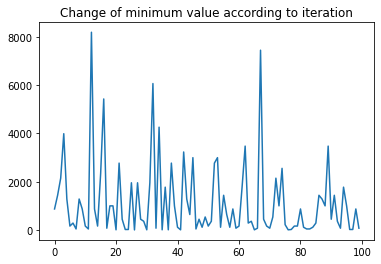

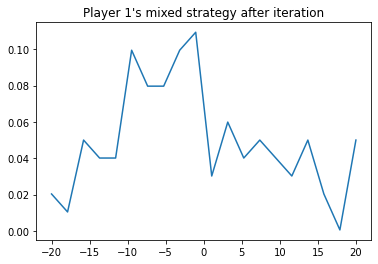

In [30]:
# 실험3
# 논문에서 f3에 해당하는 함수
def f3(player_strategies):
    y = np.sum(np.sum(player_strategies)**2)
    return y

S,history = continuos_optimization_based_on_play_theory(object_function=f3,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()

1/100 object_function([  9.47368421  -5.26315789   3.15789474  11.57894737   3.15789474
2/100 object_function([ 13.68421053  15.78947368  17.89473684  -5.26315789   5.26315789
3/100 object_function([-15.78947368  13.68421053   3.15789474 -13.68421053  11.57894737
4/100 object_function([ -1.05263158   3.15789474   3.15789474  -9.47368421   7.36842105
5/100 object_function([ 7.36842105 -5.26315789 -1.05263158 -9.47368421  7.36842105 -1.05263158
6/100 object_function([-11.57894737  20.          15.78947368 -20.          11.57894737
7/100 object_function([ 20.          -5.26315789   5.26315789  -1.05263158  11.57894737
8/100 object_function([  7.36842105   1.05263158   7.36842105 -11.57894737   5.26315789
9/100 object_function([-11.57894737   3.15789474   5.26315789  -5.26315789  11.57894737
10/100 object_function([  7.36842105   3.15789474   7.36842105  -5.26315789   5.26315789
11/100 object_function([-11.57894737  -5.26315789   5.26315789  13.68421053   1.05263158
12/100 object_function(

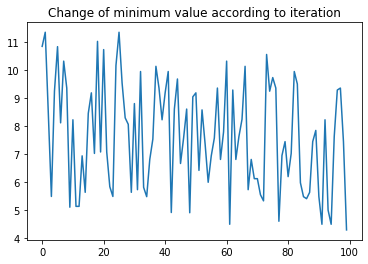

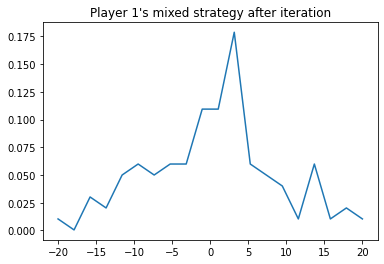

In [31]:
# 실험4
# 논문에서 f4에 해당하는 함수
def f4(player_strategies):
    y = (np.sum(player_strategies**2))**0.25 * (np.sin(50*np.sum(player_strategies**2)**0.1)**2 + 1.0)
    return y

S,history = continuos_optimization_based_on_play_theory(object_function=f4,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()

In [0]:
# 게임이론 최적화 알고리즘 

import random
import numpy as np


class Based_on_play_theory_optimizer():

    def __make_strategy(self, number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
        """
        주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
        전체 pure strategy와 mixed strategy를 생성한다.
        [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
        .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
        """
        def non_duplicate_randrange(l,h,r,c):
            #lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
            #while (not len(lst[:,0]) == len(set(lst[:,0]))):
            #    lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
            #return lst    
            t = np.ones((c,2))
            x = np.linspace(l, h, c)
            t[:,0] = x[:]
            t[:,1] = 1/c    
            return t    

        S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
        return np.asarray(S, dtype=np.float64)

    def __choice_strategies(self, strategy_matrix):
        """
        S에서 player들에 대한 전략을 선택 한다.
        선택은 mixed strategy의 확율에 의해..
        """
        return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])

    
    def __make_Y_sample(self, strategy_matrix,player=0,p_strategy=0,sample_count = 10):
        """
        player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
        """
        Y_sample = np.asarray([self.__choice_strategies(strategy_matrix) for i in range(sample_count)])
        Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
        return Y_sample

    def __u_si_Y_i(self, test_function=None,sample_strategies = None):
        """
        (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
        """
        y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
        return y_m

    def optimize(self,
                 object_function=None,
                 player_count=10,
                 strategy_range=[-20,20],
                 number_of_strategies = 20,
                 sample_count = 10,
                 epoch = 100,
                 resolution=1,
                 verbose=1):
        
        strategy_matrix = self.__make_strategy(player_count,strategy_range,number_of_strategies,resolution)
        history = []
        for t in range(1,epoch+1):
            #Sample strategy 추출
            si_Y_i = np.asarray([[self.__make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
            #시행에 대한 best response 추출
            br = np.asarray([strategy_matrix[i,self.__u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
            #mixed strategy의 갱신
            for i in range(strategy_matrix.shape[0]):
                strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
            #다음 strategy 추출
            s = self.__choice_strategies(strategy_matrix)
            # 목적함수의 값 산출
            mv = np.asscalar(object_function(s))
            if verbose:
              print("\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), end="", flush=True)
            history.append(mv)
        return strategy_matrix,history,s

1/100 object_function([-11.57894737 -20.           5.26315789  13.68421053  11.57894737
   3.15789474   3.15789474 -13.68421053   7.36842105 -15.78947368])=-44.27786037277665               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


2/100 object_function([-20.         -17.89473684 -20.         -17.89473684 -20.
3/100 object_function([  5.26315789 -17.89473684 -20.         -20.         -20.
4/100 object_function([-20.         -17.89473684   3.15789474 -20.           3.15789474
5/100 object_function([ -7.36842105 -20.           3.15789474 -20.         -20.
6/100 object_function([-20.          -5.26315789 -15.78947368 -17.89473684 -17.89473684
7/100 object_function([-20.         -20.         -20.         -17.89473684   3.15789474
8/100 object_function([ -7.36842105  -9.47368421 -17.89473684 -17.89473684 -13.68421053
9/100 object_function([-20.           7.36842105  -3.15789474 -17.89473684 -17.89473684
10/100 object_function([-17.89473684 -20.         -20.         -17.89473684 -17.89473684
11/100 object_function([-17.89473684  11.57894737 -17.89473684  -1.05263158 -17.89473684
12/100 object_function([-20.           3.15789474 -17.89473684 -17.89473684 -15.78947368
13/100 object_function([-20.          11.57894737 -17

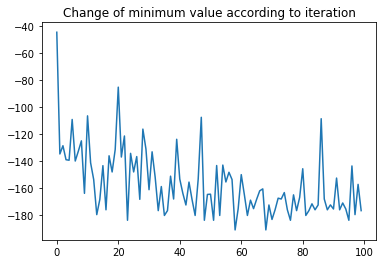

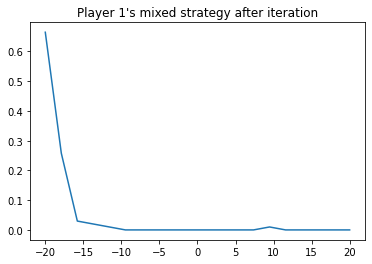

In [46]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

play_optimizer = Based_on_play_theory_optimizer()

S,history,op = play_optimizer.optimize(object_function=f1,player_count=10,strategy_range=[-20,20],number_of_strategies=20,sample_count=10,epoch=100,resolution=1)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()


(30, 30)

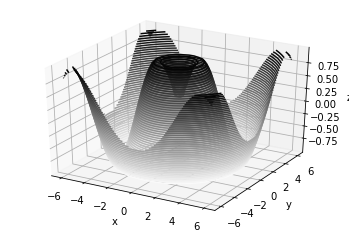

In [2]:
# player_optimizer의 global optimum을 확인해 보기 위해 
# global, local optimum을 갖는 함수 하나를 선택에서 테스트 해본다...
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    X, Y = np.meshgrid(x[0],x[1])
    return np.sin(np.sqrt(X ** 2 + Y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

Z = f([x, y])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
Z.shape

In [3]:
# 함수의 1차 편미분
# https://m.blog.naver.com/ssdyka/221299637545

import numpy as np


def numerucal_gradient(f,x):
    h = 1e-4  #0.0001
    # x와 형상이 같은 배열에 모두0인 값
    if len(x.shape) == 1:
      grad = np.zeros(x.shape)
    else:  
      grad = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
    for idx in range(x.shape[0]):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val-h
        fxh2 = f(x)    
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

dz = numerucal_gradient(f,np.array([x,y]))
dz

array([[[ 0.2086543 ,  0.11487119,  0.02209132, ..., -0.02211283,
         -0.11489414, -0.20867622],
        [ 0.12337941,  0.01628328, -0.08104413, ...,  0.08102256,
         -0.0163084 , -0.12340558],
        [ 0.02562401, -0.08752872, -0.18150649, ...,  0.18148679,
          0.0875033 , -0.02565281],
        ...,
        [ 0.02562401, -0.08752872, -0.18150649, ...,  0.18148679,
          0.0875033 , -0.02565281],
        [ 0.12337941,  0.01628328, -0.08104413, ...,  0.08102256,
         -0.0163084 , -0.12340558],
        [ 0.2086543 ,  0.11487119,  0.02209132, ..., -0.02211283,
         -0.11489414, -0.20867622]],

       [[ 0.2086543 ,  0.12337941,  0.02562401, ...,  0.02562401,
          0.12337941,  0.2086543 ],
        [ 0.11487119,  0.01628328, -0.08752872, ..., -0.08752872,
          0.01628328,  0.11487119],
        [ 0.02209132, -0.08104413, -0.18150649, ..., -0.18150649,
         -0.08104413,  0.02209132],
        ...,
        [-0.02211283,  0.08102256,  0.18148679, ...,  

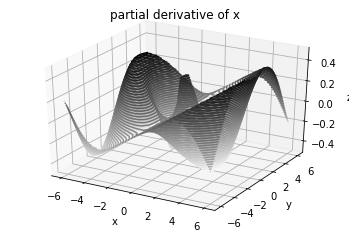

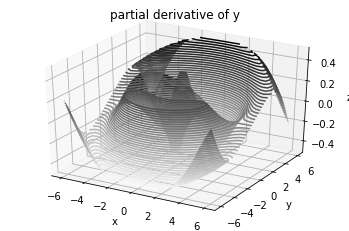

In [4]:
# 위의 함수의 global optimum과 local optimum을 확인하기 위해, 1차 편미분을 이용하여 찾는다 --> 결국은 Gradient decent 이기는 하지만...

dz_dx = dz[0]  # 함수의 x에 대한 편미분
dz_dy = dz[1] # y에 대한 편미분

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, dz_dx, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title("partial derivative of x")
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, dz_dy, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title("partial derivative of y")
plt.show()


In [12]:
# gradient decent를 통한 f의 optimum 찾기...
import random

optimum_point = []

for i in range(100):

  cur_x = [random.randint(-600, 600)/100,random.randint(-600, 600)/100] # The algorithm starts at x=3
  rate = 0.01 # Learning rate
  precision = 0.000001 #This tells us when to stop the algorithm
  previous_step_size = 1 #
  max_iters = 400 # maximum number of iterations
  iters = 0 #iteration counter
  df = numerucal_gradient(f,np.array(x)) #Gradient of our function


  while iters < max_iters:
      prev_x = cur_x #Store current x value in prev_x
      cur_x = cur_x - rate * numerucal_gradient(f,np.array(prev_x))#Grad descent
      previous_step_size = abs(cur_x - prev_x) #Change in x
      iters = iters+1 #iteration count
      #print("\r Iteration {} X value is {} P{} f={}".format(iters,cur_x,previous_step_size,f(cur_x)), end=" ", flush=True ) #Print iterations
  print("{}th local minimum occurs at {}".format(i, cur_x))
  optimum_point.append(cur_x)



0th local minimum occurs at [-3.42372927 -3.2497965 ]
1th local minimum occurs at [3.19800263 3.42144386]
2th local minimum occurs at [-3.21624643  3.43429704]
3th local minimum occurs at [-3.18452437  3.42948778]
4th local minimum occurs at [-0.56403344  4.6650266 ]
5th local minimum occurs at [-3.77811026 -2.93391712]
6th local minimum occurs at [0.29366421 4.6863913 ]
7th local minimum occurs at [ 2.03882343 -4.2277443 ]
8th local minimum occurs at [ 3.67558498 -2.90467577]
9th local minimum occurs at [-3.80226791 -2.83214194]
10th local minimum occurs at [0.34992168 4.66562237]
11th local minimum occurs at [-4.60460669 -1.01572206]
12th local minimum occurs at [4.73190889 0.2389853 ]
13th local minimum occurs at [3.06014853 3.67217824]
14th local minimum occurs at [ 4.61780181 -0.78125952]
15th local minimum occurs at [4.12739049 2.41687799]
16th local minimum occurs at [-1.43678902  4.37283615]
17th local minimum occurs at [ 4.08704235 -2.4238846 ]
18th local minimum occurs at [0.

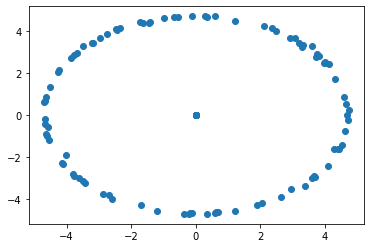

In [13]:
p = np.asarray(optimum_point)
plt.scatter(x=p[:,0],y=p[:,1])

5/100 object_function([-3.53846154 -2.61538462])=-0.9516351322998976               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


100/100 object_function([ 3.84615385 -2.61538462])=-0.9981250833056955               

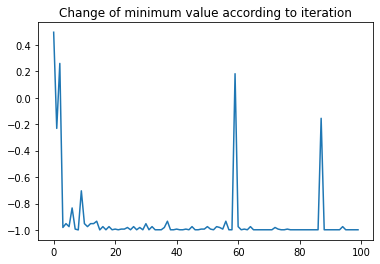

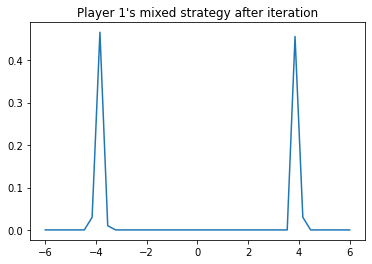

[ 3.84615385 -2.61538462]


In [43]:

# 비교 실험1
# objective function = f
# player count = 2
# strategy range = -6,6
play_optimizer = Based_on_play_theory_optimizer()

S,history,op = play_optimizer.optimize(object_function=f,player_count=2,strategy_range=[-6,6],number_of_strategies=40,sample_count=10,epoch=100,resolution=1)

plt.plot(history)
plt.title("Change of minimum value according to iteration")
plt.show()

plt.plot(S[0,:,0].reshape(S.shape[1]),S[0,:,1].reshape(S.shape[1]))
plt.title("Player 1's mixed strategy after iteration")
plt.show()

print(op)

In [47]:
# 비교 실험..

optimum_point = []
for i in range(100):
  S,history,op = play_optimizer.optimize(object_function=f,player_count=2,strategy_range=[-6,6],number_of_strategies=40,sample_count=10,epoch=100,resolution=1,verbose=0)
  print("{}th local minimum occurs at {}".format(i, op))
  optimum_point.append(op)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


0th local minimum occurs at [-2.30769231  4.15384615]
1th local minimum occurs at [ 2.30769231 -3.84615385]
2th local minimum occurs at [2.30769231 4.15384615]
3th local minimum occurs at [3.23076923 3.53846154]
4th local minimum occurs at [-2.30769231 -4.15384615]
5th local minimum occurs at [-3.53846154 -3.23076923]
6th local minimum occurs at [-3.53846154  3.23076923]
7th local minimum occurs at [-2.61538462  3.84615385]
8th local minimum occurs at [-2.30769231 -4.15384615]
9th local minimum occurs at [-3.53846154 -3.23076923]
10th local minimum occurs at [-2.61538462 -4.15384615]
11th local minimum occurs at [1.38461538 4.46153846]
12th local minimum occurs at [-2.92307692  3.84615385]
13th local minimum occurs at [-3.84615385 -2.61538462]
14th local minimum occurs at [3.84615385 2.61538462]
15th local minimum occurs at [-3.53846154  3.23076923]
16th local minimum occurs at [ 3.53846154 -3.23076923]
17th local minimum occurs at [-2.30769231  4.15384615]
18th local minimum occurs at

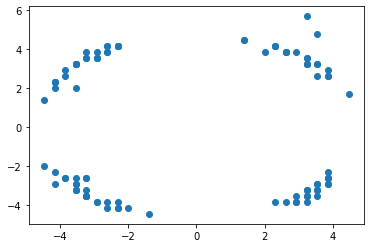

In [48]:
p = np.asarray(optimum_point)
plt.scatter(x=p[:,0],y=p[:,1])